# Stocks Data Project 

In this data project we will focus on exploratory data analysis of stock prices.


## Get the Data

we'll directly read data from Stooq finance using pandas!


*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)




In [153]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import plotly as py
import cufflinks as cf
cf.go_offline()

In [154]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>
#Add table borders

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
   for example # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [155]:
# set start and end datetime objects
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2019,12,30)
#df = pd.read_pickle('all_banks')
#df.info()


In [156]:
start.date()

datetime.date(2013, 1, 1)

In [157]:
# Thicker symbols for banks as they appear above: BAC, C, GS, JPM, MS, WFC 

In [158]:
# Bank of America
BAC = data.DataReader('BAC', 'stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JP Morgan
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)


In [159]:
#to take a look
BAC

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-03,32.850,32.900,32.5500,32.840,58982255
2019-12-02,33.450,33.750,33.3400,33.430,47199596
2019-11-29,33.370,33.520,33.2400,33.320,19503395
2019-11-27,33.490,33.600,33.3100,33.420,32090855
2019-11-26,33.380,33.400,33.1248,33.350,50660771
...,...,...,...,...,...
2014-12-10,16.159,16.344,16.0590,16.069,112049992
2014-12-09,15.880,16.261,15.8720,16.233,103795163
2014-12-08,16.324,16.519,16.1840,16.324,109263136


Create a list of the ticker symbols (as strings) in alphabetical order.

In [160]:
tickers = ["BAC ", "C ", "GS ", "JPM ", "MS ", "WFC "]

Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks.

In [161]:
# using pd.concat method
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [162]:
bank_stocks.head()

BAC                                       C                   \
             Open   High      Low  Close    Volume   Open     High    Low   
Date                                                                        
2019-12-03  32.85  32.90  32.5500  32.84  58982255  73.38  73.4700  72.50   
2019-12-02  33.45  33.75  33.3400  33.43  47199596  75.42  75.9300  74.43   
2019-11-29  33.37  33.52  33.2400  33.32  19503395  75.43  75.7972  74.99   
2019-11-27  33.49  33.60  33.3100  33.42  32090855  75.89  76.1300  75.50   
2019-11-26  33.38  33.40  33.1248  33.35  50660771  75.84  75.8400  74.82   

                             ...    MS                                   WFC   \
            Close    Volume  ...   Open   High    Low  Close    Volume   Open   
Date                         ...                                                
2019-12-03  73.33  13750091  ...  48.42  48.42  47.44  48.11  12541663  53.00   
2019-12-02  74.52  11093073  ...  49.58  49.96  49.06  49.08   8117599  54.31   
2019-11-29  75.12   6246876  ...  49.70  49.72  49.37  49.48   4138428  54.07   
2019-11-27  75.72   7591871  ...  49.63  49.87  49.50  49.78   8612269  54.15   
2019-11-26  75.46  11306998  ...  49.92  49.93  49.07  49.41  10369313  54.11   

                                             
              High     Low  Close    Volume  
Date                                         
2019-12-03  53.030  52.165  52.58  25700973  
2019-12-02  54.440  53.550  53.62  20253309  
2019-11-29  54.750  54.070  54.46  10508630  
2019-11-27  54.395  54.010  54.34  16352886  
2019-11-26  54.120  53.730  53.81  18081019  

[5 rows x 30 columns]

In [163]:
#Set the column name levels
bank_stocks.columns.names = ['Bank Ticker','Stock Info']


In [164]:
bank_stocks.head()

Bank Ticker   BAC                                       C                   \
Stock Info    Open   High      Low  Close    Volume   Open     High    Low   
Date                                                                         
2019-12-03   32.85  32.90  32.5500  32.84  58982255  73.38  73.4700  72.50   
2019-12-02   33.45  33.75  33.3400  33.43  47199596  75.42  75.9300  74.43   
2019-11-29   33.37  33.52  33.2400  33.32  19503395  75.43  75.7972  74.99   
2019-11-27   33.49  33.60  33.3100  33.42  32090855  75.89  76.1300  75.50   
2019-11-26   33.38  33.40  33.1248  33.35  50660771  75.84  75.8400  74.82   

Bank Ticker                   ...    MS                                  \
Stock Info   Close    Volume  ...   Open   High    Low  Close    Volume   
Date                          ...                                         
2019-12-03   73.33  13750091  ...  48.42  48.42  47.44  48.11  12541663   
2019-12-02   74.52  11093073  ...  49.58  49.96  49.06  49.08   8117599   
2019-11-29   75.12   6246876  ...  49.70  49.72  49.37  49.48   4138428   
2019-11-27   75.72   7591871  ...  49.63  49.87  49.50  49.78   8612269   
2019-11-26   75.46  11306998  ...  49.92  49.93  49.07  49.41  10369313   

Bank Ticker   WFC                                    
Stock Info    Open    High     Low  Close    Volume  
Date                                                 
2019-12-03   53.00  53.030  52.165  52.58  25700973  
2019-12-02   54.31  54.440  53.550  53.62  20253309  
2019-11-29   54.07  54.750  54.070  54.46  10508630  
2019-11-27   54.15  54.395  54.010  54.34  16352886  
2019-11-26   54.11  54.120  53.730  53.81  18081019  

[5 rows x 30 columns]


Using the data a bit!  [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).


**To figure out what is the max close price for each bank's stock throughout the time period**

In [165]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC      33.470
C        76.177
GS      266.450
JPM     132.060
MS       56.250
WFC      61.586
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [166]:
returns = pd.DataFrame()

In [167]:
bank_stocks.head()

Bank Ticker   BAC                                       C                   \
Stock Info    Open   High      Low  Close    Volume   Open     High    Low   
Date                                                                         
2019-12-03   32.85  32.90  32.5500  32.84  58982255  73.38  73.4700  72.50   
2019-12-02   33.45  33.75  33.3400  33.43  47199596  75.42  75.9300  74.43   
2019-11-29   33.37  33.52  33.2400  33.32  19503395  75.43  75.7972  74.99   
2019-11-27   33.49  33.60  33.3100  33.42  32090855  75.89  76.1300  75.50   
2019-11-26   33.38  33.40  33.1248  33.35  50660771  75.84  75.8400  74.82   

Bank Ticker                   ...    MS                                  \
Stock Info   Close    Volume  ...   Open   High    Low  Close    Volume   
Date                          ...                                         
2019-12-03   73.33  13750091  ...  48.42  48.42  47.44  48.11  12541663   
2019-12-02   74.52  11093073  ...  49.58  49.96  49.06  49.08   8117599   
2019-11-29   75.12   6246876  ...  49.70  49.72  49.37  49.48   4138428   
2019-11-27   75.72   7591871  ...  49.63  49.87  49.50  49.78   8612269   
2019-11-26   75.46  11306998  ...  49.92  49.93  49.07  49.41  10369313   

Bank Ticker   WFC                                    
Stock Info    Open    High     Low  Close    Volume  
Date                                                 
2019-12-03   53.00  53.030  52.165  52.58  25700973  
2019-12-02   54.31  54.440  53.550  53.62  20253309  
2019-11-29   54.07  54.750  54.070  54.46  10508630  
2019-11-27   54.15  54.395  54.010  54.34  16352886  
2019-11-26   54.11  54.120  53.730  53.81  18081019  

[5 rows x 30 columns]

In [168]:
tickers

['BAC ', 'C ', 'GS ', 'JPM ', 'MS ', 'WFC ']

In [169]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2019-12-03,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-02,0.017966,0.016228,0.025443,0.013022,0.020162,0.019779
2019-11-29,-0.003290,0.008052,0.017046,0.002206,0.008150,0.015666
2019-11-27,0.003001,0.007987,0.007228,0.002277,0.006063,-0.002203
2019-11-26,-0.002095,-0.003434,-0.002243,-0.002953,-0.007433,-0.009753


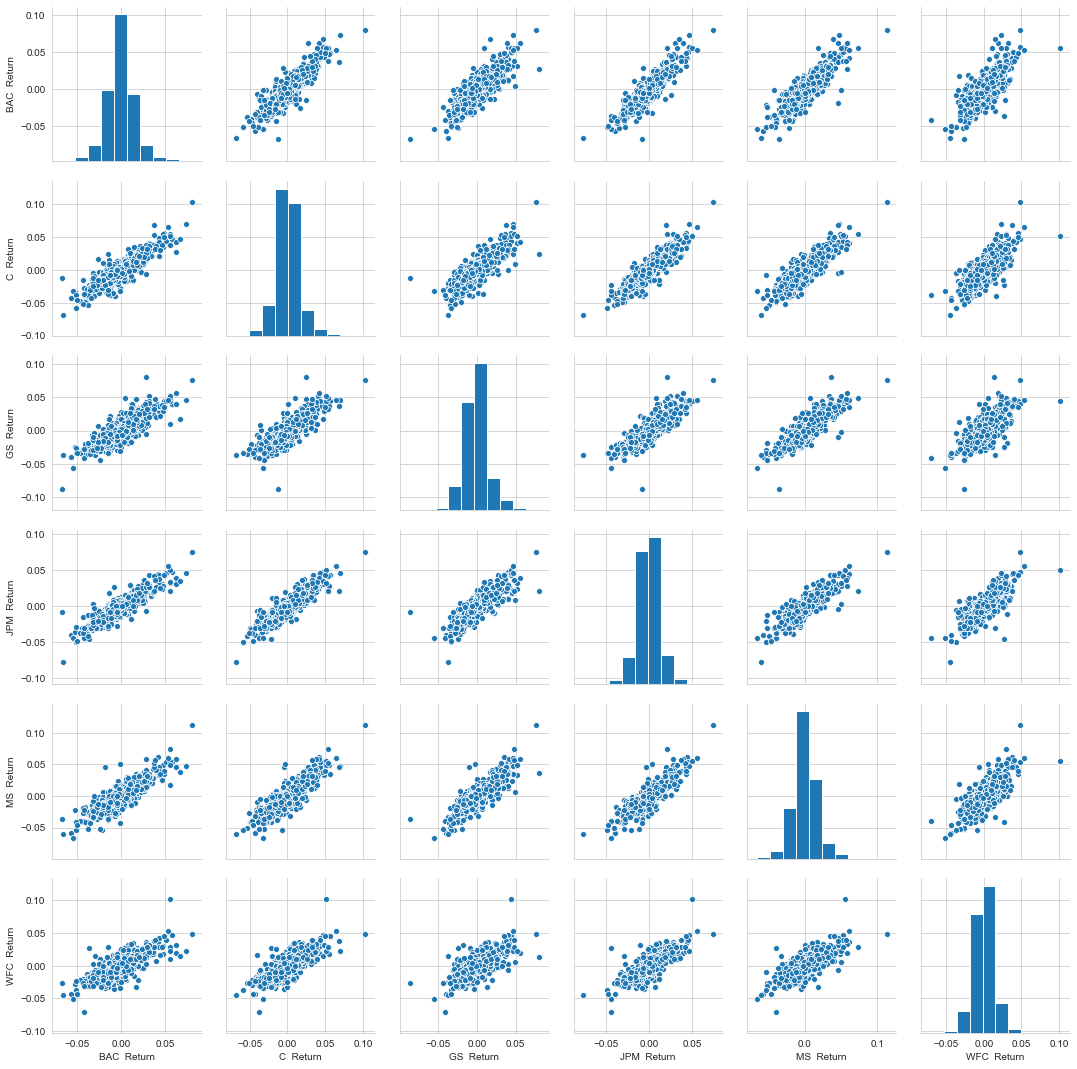

In [170]:
import seaborn as sns
sns.pairplot(data=returns[1:]) # remove first row (NaN elements)  

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [171]:
#minimum
returns.idxmin()

BAC  Return   2019-01-15
C  Return     2016-02-11
GS  Return    2019-01-15
JPM  Return   2016-02-11
MS  Return    2016-11-08
WFC  Return   2016-11-09
dtype: datetime64[ns]

In [172]:
#max
returns.idxmax()

BAC  Return   2016-06-23
C  Return     2016-06-23
GS  Return    2018-11-09
JPM  Return   2016-06-23
MS  Return    2016-06-23
WFC  Return   2018-02-02
dtype: datetime64[ns]

which stock is the riskiest over the entire time period? 

In [173]:
# std over the entire time period
returns.std() # Higher std translates to riskier

BAC  Return    0.016267
C  Return      0.015798
GS  Return     0.015076
JPM  Return    0.013273
MS  Return     0.016685
WFC  Return    0.013322
dtype: float64

In [174]:
# std for Nov 2019
returns.loc['2019-11-30':'2019-11-01'].std()

BAC  Return    0.007300
C  Return      0.009507
GS  Return     0.009445
JPM  Return    0.004682
MS  Return     0.009983
WFC  Return    0.008766
dtype: float64

** Create a distplot using seaborn of the returns for Morgan Stanley **

/Users/moazradwan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



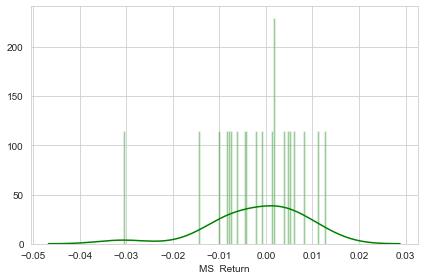

In [175]:
sns.set_style("whitegrid")
sns.distplot(returns.ix['2019-11-30':'2019-11-01']['MS  Return'], bins=100, color='green')
plt.tight_layout()

In [176]:
returns.ix['2019-11-30':'2019-11-01']['MS  Return'].head()

/Users/moazradwan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



Date
2019-11-29    0.008150
2019-11-27    0.006063
2019-11-26   -0.007433
2019-11-25    0.011131
2019-11-22   -0.014211
Name: MS  Return, dtype: float64

** Create a distplot using seaborn of the returns for CitiGroup **

/Users/moazradwan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



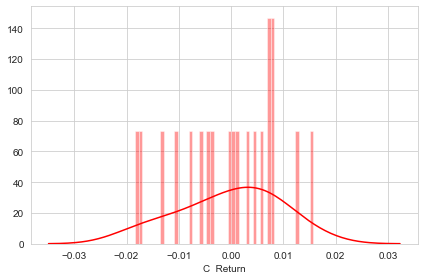

In [177]:
# using the 2013 data
sns.set_style("whitegrid")
sns.distplot(returns.ix['2019-11-30':'2019-11-01']['C  Return'], bins=50, color='red')
plt.tight_layout()

** Create a line plot showing Close price for each bank for the entire index of time. use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [178]:
bank_stocks.head()

Bank Ticker   BAC                                       C                   \
Stock Info    Open   High      Low  Close    Volume   Open     High    Low   
Date                                                                         
2019-12-03   32.85  32.90  32.5500  32.84  58982255  73.38  73.4700  72.50   
2019-12-02   33.45  33.75  33.3400  33.43  47199596  75.42  75.9300  74.43   
2019-11-29   33.37  33.52  33.2400  33.32  19503395  75.43  75.7972  74.99   
2019-11-27   33.49  33.60  33.3100  33.42  32090855  75.89  76.1300  75.50   
2019-11-26   33.38  33.40  33.1248  33.35  50660771  75.84  75.8400  74.82   

Bank Ticker                   ...    MS                                  \
Stock Info   Close    Volume  ...   Open   High    Low  Close    Volume   
Date                          ...                                         
2019-12-03   73.33  13750091  ...  48.42  48.42  47.44  48.11  12541663   
2019-12-02   74.52  11093073  ...  49.58  49.96  49.06  49.08   8117599   
2019-11-29   75.12   6246876  ...  49.70  49.72  49.37  49.48   4138428   
2019-11-27   75.72   7591871  ...  49.63  49.87  49.50  49.78   8612269   
2019-11-26   75.46  11306998  ...  49.92  49.93  49.07  49.41  10369313   

Bank Ticker   WFC                                    
Stock Info    Open    High     Low  Close    Volume  
Date                                                 
2019-12-03   53.00  53.030  52.165  52.58  25700973  
2019-12-02   54.31  54.440  53.550  53.62  20253309  
2019-11-29   54.07  54.750  54.070  54.46  10508630  
2019-11-27   54.15  54.395  54.010  54.34  16352886  
2019-11-26   54.11  54.120  53.730  53.81  18081019  

[5 rows x 30 columns]

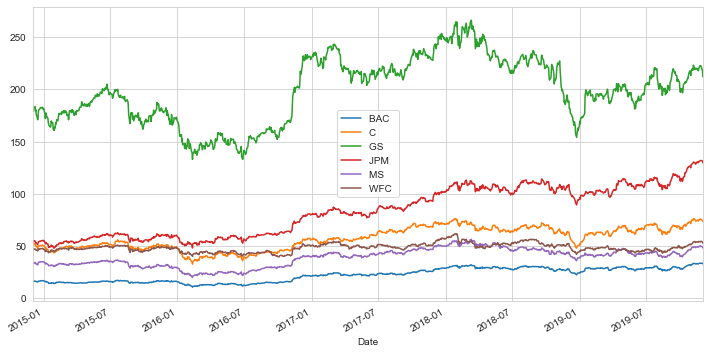

In [179]:
# using pandas xs
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(12,6), label=tick)
plt.legend()


In [180]:
# Using live plots with plotly
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

In [181]:
BAC.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-03,32.85,32.90,32.5500,32.84,58982255
2019-12-02,33.45,33.75,33.3400,33.43,47199596
2019-11-29,33.37,33.52,33.2400,33.32,19503395
2019-11-27,33.49,33.60,33.3100,33.42,32090855
2019-11-26,33.38,33.40,33.1248,33.35,50660771


In [182]:
#the cufflinks library to create some Technical Analysis plots for BAC. 
BAC[['Open','High','Low','Close']].ix['2019-11-30':'2019-11-01'].iplot(kind='candle')


/Users/moazradwan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



** Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley **

In [183]:
MS['Close'].loc['2019-11-30':'2019-11-01'].ta_plot(study='sma', title='Simple Moving Averages')

**Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America.**

In [184]:
BAC['Close'].loc['2019-11-30':'2019-11-01'].ta_plot(study='boll', title='Bollinger Band Plot')